In [3]:
import csv #import csv so i could csvreader but i didnt actually use this
import pandas as pd # pandas to convert my csv to a dataframe
from sklearn.preprocessing import StandardScaler #for normalisation
import numpy as np #
from sklearn.decomposition import PCA # for PCA
import matplotlib.pyplot as plt

Great! trying this out!


(1408, 19144)
7.997666360125873e-18 1.0000000000000009
<class 'numpy.ndarray'>


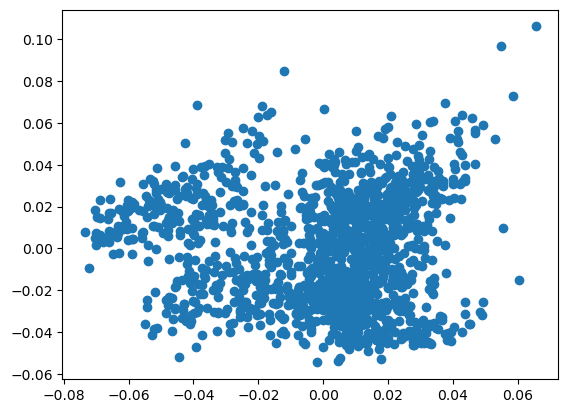

In [15]:
expression = pd.read_csv('/home/alanah/Downloads/Expression_Public_22Q4.csv', index_col=0) #read in gene expression csv as a dataframe, index so it reads in row names
#result = expression.head(10) #test to see if it read in correctly
#print("First 10 rows of the DataFrame:")
#print(result)
#print(expression.iloc[[0]]) # trying the iloc function to see how it works 
column_names = list(expression.columns.values) #extracting the column names
row_names = list(expression.index.values) #extracting rwo names
#print(row_names)


x = expression.iloc[:, ].values #index all the values from the expression datafram, not sure if this is useful
x = StandardScaler().fit_transform(x) # normalizing the features
print(x.shape) #whats the dimensions of the data
print(np.mean(x),np.std(x)) #check mean and stadard deviation of normalised data
#print(type(x))
pca_expression = PCA(n_components=2) #make a PCA q with 2 principal components 
principalComponents_exp = pca_expression.fit_transform(np.transpose(x))
plt.scatter(pca_expression.components_[0,:], pca_expression.components_[1,:]) # plot the PCA as a scatter plot with a component on eah axis
plt.show() # show PCA plot




            A1BG  A1CF  A2M  A2ML1  A3GALT2  A4GALT  A4GNT  AAAS  AACS  AADAC  \
ACH-000001     0     0    0      0        0       0      0     0     0      0   
ACH-000002     0     0    0      0        0       0      0     0     0      0   
ACH-000004     0     0    0      0        0       0      0     0     0      0   
ACH-000005     0     0    0      0        0       0      0     0     0      0   
ACH-000006     0     0    0      0        0       0      0     0     0      0   
ACH-000007     0     0    0      0        0       0      0     0     0      0   
ACH-000008     0     0    0      0        0       0      0     0     0      0   
ACH-000009     0     0    0      0        0       0      0     0     0      0   
ACH-000011     0     0    0      0        0       0      0     0     0      0   
ACH-000012     0     0    0      0        0       0      0     0     0      0   

            ...  ZUP1  ZW10  ZWILCH  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  ZYX  \
ACH-000001  ...     0     0   

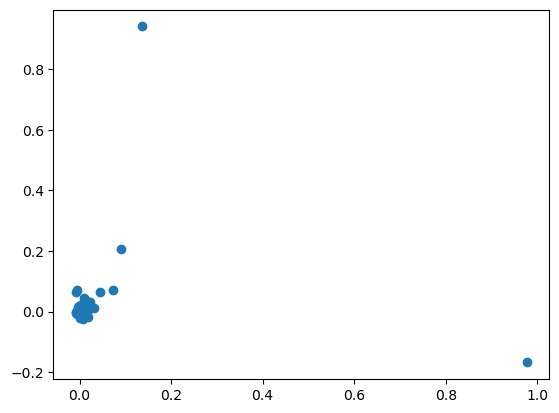

In [7]:
mutation = pd.read_csv('/home/alanah/Downloads/Damaging_Mutations.csv', index_col=0) #read in gene expression csv as a dataframe, index so it reads in row names
result = mutation.head(10) #test to see if it read in correctly
#print("First 10 rows of the DataFrame:")
print(result)
#print(expression.iloc[[0]]) # trying the iloc function to see how it works 
column_names = list(mutation.columns.values) #extracting the column names
row_names_mut = list(mutation.index.values) #extracting rwo names
#print(row_names)

x_mut = mutation.iloc[:, ].values #index all the values from the expression datafram, not sure if this is useful
x_mut = StandardScaler().fit_transform(x_mut) # normalizing the features
print(x.shape) #whats the dimensions of the data
print(np.mean(x),np.std(x)) #check mean and stadard deviation of normalised data
#print(type(x))
pca_mutation = PCA(n_components=2) #make a PCA q with 2 principal components 
principalComponents_exp = pca_mutation.fit_transform(np.transpose(x_mut))
plt.scatter(pca_mutation.components_[0,:], pca_mutation.components_[1,:]) # plot the PCA as a scatter plot with a component on eah axis
plt.show() # show PCA plot

In [27]:
overlap_exp  = list()
overlap_mut = list()
for i in range(len(row_names)):     # for the number of rows in expression
    if row_names_mut.count(row_names[i])>0: # if the number of rows in mutation when counting the rows in expression is greater than 0
        overlap_exp.append(i) #add this row to the list which 
        overlap_mut.append(row_names_mut.index(row_names[i]))

row_names[(overlap_exp)] == row_names_mut[(overlap_mut)]

#x_exp_overlap = x[overlap_exp,:]
#x_mut_overlap = x_mut[overlap_mut,:]

TypeError: list indices must be integers or slices, not list